In [1]:
import os
import sys
import csv
import random
import numpy as np
import pandas as pd
from decimal import *
from Bio import SeqIO
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import *

## Load Data

<b>Load DNA Sequences dataset</b>

In [2]:
load_dna_seq = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        load_dna_seq.append([filename, str(sequences[0]), folder_item])

origin_dna_df = pd.DataFrame(load_dna_seq, columns=["GenBank ID (filename)", "DNA Sequences", "Virus name"])
origin_dna_df

,GenBank ID (filename),DNA Sequences,Virus name
0,AC_000007.1.fasta,CATCATCATAATATACCTTATTTTGGATTGAAGCCAATATGATAAT...,Human Adenovirus
1,AC_000008.1.fasta,CATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATAA...,Human Adenovirus
2,AC_000017.1.fasta,CATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATAA...,Human Adenovirus
3,AC_000018.1.fasta,CTCTCTATTTAATATACCTTATAGATGGAATGGTGCCAATATGTAA...,Human Adenovirus
4,AC_000019.1.fasta,CATCATCAATAATATACCTTATAGATGGAATGGTGCCAATATGTAA...,Human Adenovirus
...,...,...,...
135,MH916806.1.fasta,CAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATC...,Zika virus
136,MK241417.1.fasta,GACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATCAACAGGTT...,Zika virus
137,MN100039.1.fasta,GTGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCA...,Zika virus
138,MN124090.1.fasta,TGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAA...,Zika virus


<b>Load Protein sequences dataset</b>

In [3]:
load_protein_seq = []

for folder_item in os.listdir("Protein"):
    for filename in os.listdir("Protein/" + folder_item):
        path = "Protein/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        load_protein_seq.append([filename, str(sequences[0]), folder_item])

origin_protein_df = pd.DataFrame(load_protein_seq, columns=["GenBank ID (filename)", "Protein Sequences", "Virus name"])
origin_protein_df

,GenBank ID (filename),Protein Sequences,Virus name
0,AC_000007.1.txt,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,Human Adenovirus
1,AC_000008.1.txt,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,Human Adenovirus
2,AC_000017.1.txt,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,Human Adenovirus
3,AC_000018.1.txt,MRHLRFLPQEIIFSETGIEILEFVVNTLMGDDPEPPVQPFDPPTLH...,Human Adenovirus
4,AC_000019.1.txt,MRDLRFLPQEIISAETGNEILELVVHALMGDDPEPPVQLFEPPTLQ...,Human Adenovirus
...,...,...,...
135,MH916806.1.txt,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,Zika virus
136,MK241417.1.txt,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,Zika virus
137,MN100039.1.txt,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,Zika virus
138,MN124090.1.txt,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,Zika virus


# Feature Extraction

### Index-based Encoding

In [4]:
def dna_index_encoding(Text, n):
    dna_token = {"AAA": 1, "AAC": 2, "AAT": 3, "AAG": 4, "ACA": 5, "ACC": 6, "ACT": 7, "ACG": 8, "ATA": 9, "ATC": 10, "ATT": 11, "ATG": 12, "AGA": 13, "AGC": 14, "AGT": 15, "AGG": 16,
                "CAA": 17, "CAC": 18, "CAT": 19, "CAG": 20, "CCA": 21, "CCC": 22, "CCT": 23, "CCG": 24, "CTA": 25, "CTC": 26, "CTT": 27, "CTG": 28, "CGA": 29, "CGC": 30, "CGT": 31, "CGG": 32,
                "GAA": 33, "GAC": 34, "GAT": 35, "GAG": 36, "GCA": 37, "GCC": 38, "GCT": 39, "GCG": 40, "GTA": 41, "GTC": 42, "GTT": 43, "GTG": 44, "GGA": 45, "GGC": 46, "GGT": 47, "GGG": 48,
                "TAA": 49, "TAC": 50, "TAT": 51, "TAG": 52, "TCA": 53, "TCC": 54, "TCT": 55, "TCG": 56, "TTA": 57, "TTC": 58, "TTG": 59, "TGA": 60, "TGC": 61, "TGT": 62, "TGG": 63, "TTT": 64}

    encoding_sequence = []
    l=len(Text)

    for i in range (l-n+1):
        Pattern = Text[i:i+n]
        try:
            index = dna_token[Pattern]
            encoding_sequence.append(index)
        except KeyError as e:
            print("Unknown sequence:", e)
            continue

    return encoding_sequence

In [5]:
encoding_result = []
encoding_filename = []
encoding_label = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        print(f"Opening: {folder_item}/{filename}")
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        seq_arr = dna_index_encoding(str(sequences[0]), 3)
        encoding_result.append(seq_arr)
        encoding_filename.append(filename)
        encoding_label.append(folder_item)

Opening: Human Adenovirus/AC_000007.1.fasta
Opening: Human Adenovirus/AC_000008.1.fasta
Opening: Human Adenovirus/AC_000017.1.fasta
Opening: Human Adenovirus/AC_000018.1.fasta
Opening: Human Adenovirus/AC_000019.1.fasta
Opening: Human Adenovirus/JF799911.1.fasta
Opening: Human Adenovirus/JN226746.1.fasta
Opening: Human Adenovirus/MK241690.1.fasta
Opening: Human Adenovirus/MK357714.1.fasta
Opening: Human Adenovirus/MK357715.1.fasta
Opening: Human Adenovirus/MT113942.1.fasta
Opening: Human Adenovirus/MT113944.1.fasta
Opening: Human Adenovirus/NC_001405.1.fasta
Opening: Human Adenovirus/NC_001454.1.fasta
Opening: Human Adenovirus/NC_001460.1.fasta
Opening: Human Adenovirus/NC_003266.2.fasta
Opening: Human Adenovirus/NC_010956.1.fasta
Opening: Human Adenovirus/NC_011202.1.fasta
Opening: Human Adenovirus/NC_011203.1.fasta
Opening: Human Adenovirus/OL450401.1.fasta
Opening: MERS-CoV/KF958702.1.fasta
Opening: MERS-CoV/KT806047.1.fasta
Opening: MERS-CoV/KU710265.1.fasta
Opening: MERS-CoV/KX034

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences for filling the blank arrays
padded = pad_sequences(encoding_result, padding='post', truncating='post')
padded

array([[19, 10, 53, ...,  0,  0,  0],
       [19, 10, 53, ...,  0,  0,  0],
       [19, 10, 53, ..., 60, 35, 12],
       ...,
       [44, 62, 44, ...,  0,  0,  0],
       [62, 44, 60, ...,  0,  0,  0],
       [36, 15, 43, ...,  0,  0,  0]])

In [7]:
#pd.set_option('display.max_rows', None)

encoding_df1 = pd.DataFrame(encoding_filename, columns=["GenBank ID"])
encoding_df2 = pd.DataFrame(padded)
encoding_df3 = pd.DataFrame(encoding_label, columns=["Virus name"])

encoding_df = pd.concat([encoding_df1, encoding_df2, encoding_df3], axis=1)
encoding_df

,GenBank ID,0,1,2,3,4,5,6,7,8,...,35990,35991,35992,35993,35994,35995,35996,35997,35998,Virus name
0,AC_000007.1.fasta,19,10,53,19,10,53,19,9,49,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
1,AC_000008.1.fasta,19,10,53,19,10,53,17,3,9,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
2,AC_000017.1.fasta,19,10,53,19,10,53,17,3,9,...,51,11,59,60,35,12,60,35,12,Human Adenovirus
3,AC_000018.1.fasta,26,55,26,55,25,51,11,64,57,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
4,AC_000019.1.fasta,19,10,53,19,10,53,17,3,9,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.fasta,20,13,34,7,28,61,40,29,34,...,0,0,0,0,0,0,0,0,0,Zika virus
136,MK241417.1.fasta,34,5,20,15,43,58,56,29,36,...,0,0,0,0,0,0,0,0,0,Zika virus
137,MN100039.1.fasta,44,62,44,60,33,3,10,53,20,...,0,0,0,0,0,0,0,0,0,Zika virus
138,MN124090.1.fasta,62,44,60,33,3,10,53,20,13,...,0,0,0,0,0,0,0,0,0,Zika virus


In [8]:
# save table for qualification
encoding_df.to_csv("1.Index-based Encoding.csv")

### N-mers Frequency

In [9]:
# N-mers Frequency function
def n_mers(Text, n):
    freq = {}
    l=len(Text)
    for i in range (l-n+1):
        Pattern = Text[i:i+n]
        if Pattern not in freq:
            freq[Pattern] = 1 # if a pattern found is not already  in the dictionary freq{}, it is assigned a value of 1 and added to the list
        else:
            freq[Pattern] +=1 # however, if the pattern is already in the dictionary, its value should go up by 1 (so if it has been found, it is initially given a pattern of 1, and then this adds another 1 if it is found again
    return dict(sorted(freq.items()))

In [10]:
nmers_result = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        print(f"Opening: {folder_item}/{filename}")
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        result = n_mers(str(sequences[0]), 3)
        result.update({"GenBank ID": filename, "Virus name": folder_item})
        nmers_result.append(result)

Opening: Human Adenovirus/AC_000007.1.fasta
Opening: Human Adenovirus/AC_000008.1.fasta
Opening: Human Adenovirus/AC_000017.1.fasta
Opening: Human Adenovirus/AC_000018.1.fasta
Opening: Human Adenovirus/AC_000019.1.fasta
Opening: Human Adenovirus/JF799911.1.fasta
Opening: Human Adenovirus/JN226746.1.fasta
Opening: Human Adenovirus/MK241690.1.fasta
Opening: Human Adenovirus/MK357714.1.fasta
Opening: Human Adenovirus/MK357715.1.fasta
Opening: Human Adenovirus/MT113942.1.fasta
Opening: Human Adenovirus/MT113944.1.fasta
Opening: Human Adenovirus/NC_001405.1.fasta
Opening: Human Adenovirus/NC_001454.1.fasta
Opening: Human Adenovirus/NC_001460.1.fasta
Opening: Human Adenovirus/NC_003266.2.fasta
Opening: Human Adenovirus/NC_010956.1.fasta
Opening: Human Adenovirus/NC_011202.1.fasta
Opening: Human Adenovirus/NC_011203.1.fasta
Opening: Human Adenovirus/OL450401.1.fasta
Opening: MERS-CoV/KF958702.1.fasta
Opening: MERS-CoV/KT806047.1.fasta
Opening: MERS-CoV/KU710265.1.fasta
Opening: MERS-CoV/KX034

In [11]:
dna_ordered_list = ["AAA", "AAC", "AAT", "AAG", "ACA", "ACC", "ACT", "ACG", "ATA", "ATC",
                    "ATT", "ATG", "AGA", "AGC", "AGT", "AGG", "CAA", "CAC", "CAT", "CAG",
                    "CCA", "CCC", "CCT", "CCG", "CTA", "CTC", "CTT", "CTG", "CGA", "CGC",
                    "CGT", "CGG", "GAA", "GAC", "GAT", "GAG", "GCA", "GCC", "GCT", "GCG",
                    "GTA", "GTC", "GTT", "GTG", "GGA", "GGC", "GGT", "GGG", "TAA", "TAC",
                    "TAT", "TAG", "TCA", "TCC", "TCT", "TCG", "TTA", "TTC", "TTG", "TGA",
                    "TGC", "TGT", "TGG", "TTT"]

In [12]:
nmers_df = pd.DataFrame(nmers_result, columns=["GenBank ID"] + dna_ordered_list + ["Virus name"])
nmers_df

,GenBank ID,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,...,TCG,TTA,TTC,TTG,TGA,TGC,TGT,TGG,TTT,Virus name
0,AC_000007.1.fasta,801,608,353,556,568,715,455,453,317,...,343,381,466,561,549,708,474,708,647,Human Adenovirus
1,AC_000008.1.fasta,782,590,368,570,566,702,469,459,330,...,340,368,461,554,538,701,466,705,627,Human Adenovirus
2,AC_000017.1.fasta,764,603,360,574,580,693,467,457,324,...,347,404,460,555,526,708,465,710,665,Human Adenovirus
3,AC_000018.1.fasta,754,575,512,569,642,636,535,312,415,...,351,438,569,547,601,672,473,738,692,Human Adenovirus
4,AC_000019.1.fasta,900,596,561,605,634,568,522,347,408,...,345,478,652,605,592,630,524,720,786,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.fasta,237,161,126,278,233,145,157,84,105,...,58,67,111,205,223,170,162,389,107,Zika virus
136,MK241417.1.fasta,236,159,127,279,233,145,153,83,105,...,58,66,108,205,223,166,163,390,109,Zika virus
137,MN100039.1.fasta,244,162,131,280,234,146,160,85,106,...,60,66,115,208,225,166,165,393,110,Zika virus
138,MN124090.1.fasta,242,162,129,280,234,146,160,85,105,...,60,66,115,208,227,165,166,393,110,Zika virus


In [13]:
# save table for qualification
nmers_df.to_csv("2.N-mers Frequency.csv")

### Conjoint Triad

In [14]:
# Generating vector space (7*7*7)
def VS(rang):
    V = []
    for i in range(1,rang):
        for j in range(1,rang):
            for k in range(1,rang):
                tmp = "VS"+str(k) + str(j) + str(i)
                V.append(tmp)
    return V

In [15]:
# calculating conjoint triad for input sequence
def frequency(seq):
    frequency = []
    for i in range(0, (len(seq) - 3)):
        subSeq = seq[i:i+3]
        tmp = "VS"
        for j in range(0,3):
            if((subSeq[j] == 'A') or (subSeq[j] == 'G') or (subSeq[j] == 'V')):
                tmp += "1"
            elif((subSeq[j] == 'I') or (subSeq[j] == 'L') or (subSeq[j] == 'F') or (subSeq[j] == 'P')):
                tmp += "2"
            elif((subSeq[j] == 'Y') or (subSeq[j] == 'M') or (subSeq[j] == 'T') or (subSeq[j] == 'S')):
                tmp += "3"
            elif((subSeq[j] == 'H') or (subSeq[j] == 'N') or (subSeq[j] == 'Q') or (subSeq[j] == 'W')):
                tmp += "4"
            elif((subSeq[j] == 'R') or (subSeq[j] == 'K')):
                tmp += "5"
            elif((subSeq[j] == 'D') or (subSeq[j] == 'E')):
                tmp += "6"
            elif((subSeq[j] == 'C')):
                tmp += "7"
        frequency.append(tmp)
    return frequency

In [16]:
# Creating frequency_dictionary, and calaculate frequency for eaech conjoint triad
def freq_dict(V, freq):
    frequency_dictionary = {}
    for i in range(0, len(V)):
        key = V[i]
        frequency_dictionary[key] = 0

    for i in range(0, len(freq)):
        frequency_dictionary[freq[i]] = frequency_dictionary[freq[i]]+1

    return frequency_dictionary

In [17]:
# Export the output to .csv file
def output_to_csv(seq_ID, frequency_dict):

    # Each row in csv file [ seqID, frequencies ]
    data = [seq_ID]
    for key, value in frequency_dict.items():
        data.append(value)

    with open('conjoint_triad.csv', 'a') as csvfile:
        conjointTriad = csv.writer(csvfile)
        conjointTriad.writerow(data)

In [18]:
# Reading sequences from fasta file.
def fasta_input():
    print("Enter path of .fasta file : ", end='')
    path = input()
    sequences = []
    seq_IDs = []
    for record in SeqIO.parse(path, "fasta"):
        sequences.append(record.seq)
        seq_IDs.append(record.id)
    return sequences, seq_IDs

In [19]:
def conjoint_triad(sequences, seq_IDs):
    # Truncating .csv file
    filename = "conjoint_triad.csv"
    f = open(filename, "w+")
    f.close()
    # reading input file
    #sequences, seq_IDs = fasta_input()
    # Creating vector space
    v = VS(8)

    #writing vector space as header in the csv file
    header = ["GenBank ID"]
    for i in range(0, len(v)):
        header.append(v[i])
    with open(filename, "a") as headingcsv:
        headerwriter = csv.writer(headingcsv)
        headerwriter.writerow(header)
    conjoint_triad.vs_header = header

    # calculating conjoint_triad for each sequence
    for i in range(0, len(sequences)):
        fi = frequency(sequences[i])
        freqDict = freq_dict(v, fi)
        output_to_csv(seq_IDs[i], freqDict)

    # replace double \n with single \n
    file = open("conjoint_triad.csv", "r")
    csv_data = file.read()
    csv_data = csv_data.replace("\n\n", "\n")
    file.close()
    
    file = open("conjoint_triad.csv", "w+")
    file.write(csv_data)
    file.close()

In [20]:
conjT_df = [] # clear cache variable

for folder_item in os.listdir("Protein"):
    for filename in os.listdir("Protein/" + folder_item):
        path = "Protein/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        print(f"Opening: {folder_item}/{filename}")
        conjoint_triad(sequences, seq_IDs)
        
        header = conjoint_triad.vs_header + ['Virus name']
        data = pd.read_csv("conjoint_triad.csv", index_col=0)
        conj_t = list(data.sum())
        
        try:
            conjT_df.loc[len(conjT_df.index)] = [filename] + conj_t + [folder_item]
        except:
            conjT_df = pd.DataFrame(columns=header)
            conjT_df.loc[len(conjT_df.index)] = [filename] + conj_t + [folder_item]

        os.remove("conjoint_triad.csv")

print("Done !")

Opening: Human Adenovirus/AC_000007.1.txt
Opening: Human Adenovirus/AC_000008.1.txt
Opening: Human Adenovirus/AC_000017.1.txt
Opening: Human Adenovirus/AC_000018.1.txt
Opening: Human Adenovirus/AC_000019.1.txt
Opening: Human Adenovirus/JF799911.1.txt
Opening: Human Adenovirus/JN226746.1.txt
Opening: Human Adenovirus/MK241690.1.txt
Opening: Human Adenovirus/MK357714.1.txt
Opening: Human Adenovirus/MK357715.1.txt
Opening: Human Adenovirus/MT113942.1.txt
Opening: Human Adenovirus/MT113944.1.txt
Opening: Human Adenovirus/NC_001405.1.txt
Opening: Human Adenovirus/NC_001454.1.txt
Opening: Human Adenovirus/NC_001460.1.txt
Opening: Human Adenovirus/NC_003266.2.txt
Opening: Human Adenovirus/NC_010956.1.txt
Opening: Human Adenovirus/NC_011202.1.txt
Opening: Human Adenovirus/NC_011203.1.txt
Opening: Human Adenovirus/OL450401.1.txt
Opening: MERS-CoV/KF958702.1.txt
Opening: MERS-CoV/KT806047.1.txt
Opening: MERS-CoV/KU710265.1.txt
Opening: MERS-CoV/KX034096.1.txt
Opening: MERS-CoV/KX034099.1.txt
Ope

In [21]:
conjT_df

,GenBank ID,VS111,VS211,VS311,VS411,VS511,VS611,VS711,VS121,VS221,...,VS667,VS767,VS177,VS277,VS377,VS477,VS577,VS677,VS777,Virus name
0,AC_000007.1.txt,162,98,103,60,68,50,10,127,117,...,1,3,2,5,2,2,2,0,0,Human Adenovirus
1,AC_000008.1.txt,171,96,103,62,64,51,8,124,115,...,2,3,2,6,2,2,2,0,0,Human Adenovirus
2,AC_000017.1.txt,169,99,108,63,65,51,10,127,120,...,1,3,2,4,3,2,2,0,0,Human Adenovirus
3,AC_000018.1.txt,124,107,85,56,60,40,9,117,105,...,1,3,4,4,2,1,3,0,0,Human Adenovirus
4,AC_000019.1.txt,117,93,91,52,59,38,9,98,107,...,1,3,2,4,2,1,3,0,0,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.txt,57,57,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus
136,MK241417.1.txt,58,57,47,17,20,18,2,48,52,...,2,0,0,0,0,1,0,0,0,Zika virus
137,MN100039.1.txt,57,58,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus
138,MN124090.1.txt,57,58,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus


In [22]:
# save table for qualification
conjT_df.to_csv("3.Conjoint Triad.csv")

### Embedding Layers (Trainable weights)

<b>Embedding Layers for Index-based Encoding</b>

In [23]:
vocab_size = max(encoding_df.max(axis=1, numeric_only=True)) # find max value in encoding_df
embedding_dim = 84
pad_length_enc = len(padded[0])

In [24]:
print("vocab_size =", vocab_size)
print("pad_length =", pad_length_enc)

vocab_size = 64
pad_length = 35999


In [25]:
inputs_enc = tf.keras.Input(name='input_layer', shape=(pad_length_enc,))
embedding_layer_enc = Embedding(vocab_size, embedding_dim, input_length=pad_length_enc)(inputs_enc)

In [26]:
embedding_layer_enc.shape

TensorShape([None, 35999, 84])

In [27]:
embedding_model_enc = Model(inputs_enc, embedding_layer_enc)

In [28]:
embedding_model_enc.get_weights()

[array([[ 0.00774663, -0.0415499 ,  0.02793331, ..., -0.0495713 ,
         -0.00900228, -0.03358271],
        [-0.00677978, -0.0019858 , -0.02891377, ...,  0.0307183 ,
         -0.00406941, -0.02168331],
        [-0.02779012,  0.04359087,  0.01966419, ...,  0.04266448,
         -0.03633994,  0.00991029],
        ...,
        [ 0.03374958, -0.02130079,  0.02595259, ...,  0.01886215,
         -0.03131802, -0.04573097],
        [-0.02696612, -0.04588347, -0.04566096, ...,  0.02295811,
         -0.04625492, -0.02890331],
        [-0.04296944,  0.02067835,  0.03132907, ...,  0.02612468,
         -0.02100173, -0.04176008]], dtype=float32)]

In [29]:
embedding_model_enc.get_weights()[0].shape

(64, 84)

In [30]:
embedding_df = pd.DataFrame(embedding_model_enc.get_weights()[0])
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.007747,-0.041550,0.027933,-0.010641,-0.027848,-0.036618,0.022520,-0.006307,0.013914,-0.049750,...,-0.047762,0.036803,0.025596,-0.032656,0.044254,0.045695,-0.042048,-0.049571,-0.009002,-0.033583
1,-0.006780,-0.001986,-0.028914,-0.004993,-0.019702,-0.022066,0.045384,0.003507,-0.016130,-0.035871,...,-0.042928,-0.029738,0.014565,0.023420,-0.023626,0.022968,0.031378,0.030718,-0.004069,-0.021683
2,-0.027790,0.043591,0.019664,0.036293,0.048639,0.041702,0.048806,0.017550,0.044989,0.026616,...,0.029654,0.039122,0.037459,0.009270,0.029909,-0.028219,0.035765,0.042664,-0.036340,0.009910
3,-0.046459,-0.041480,0.007425,0.011937,0.001241,-0.016805,0.047265,0.009855,0.043788,-0.024473,...,-0.040845,-0.032225,0.043003,0.024941,0.022055,0.039719,-0.029082,0.003875,-0.045563,0.010219
4,-0.029450,-0.001886,-0.010796,-0.003816,-0.021812,0.030648,0.046900,0.020482,-0.001813,-0.037868,...,-0.039428,0.049692,0.007900,-0.028170,0.023590,0.022302,-0.000284,0.010473,-0.038788,0.021380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.023274,-0.034094,-0.032228,-0.019649,0.009560,0.010078,0.014555,-0.038877,0.008402,0.022834,...,-0.018775,0.043576,0.022486,-0.011933,-0.003549,0.027211,0.005798,0.024158,0.042512,-0.043027
60,-0.003099,0.022542,-0.038890,-0.018823,0.040982,0.031792,-0.001064,-0.015563,-0.049823,0.015209,...,0.037793,0.012963,0.029173,-0.004961,-0.003417,0.032828,-0.029812,-0.038549,-0.018522,-0.046682
61,0.033750,-0.021301,0.025953,-0.033943,0.004206,-0.028546,-0.008214,0.017086,0.015569,0.013726,...,-0.024241,0.043532,-0.008569,0.033363,-0.006426,-0.048963,0.007571,0.018862,-0.031318,-0.045731
62,-0.026966,-0.045883,-0.045661,0.016923,0.035767,0.005955,0.049202,-0.048784,-0.020518,0.033850,...,-0.047395,0.041012,0.013185,-0.049884,-0.013783,-0.007630,0.019148,0.022958,-0.046255,-0.028903


In [31]:
# save table for qualification
embedding_df.to_csv("4.Embedding Layers_Index-based.csv")

<b>Embedding Layers for N-mers Frequency</b>

In [32]:
vocab_size = max(nmers_df.max(axis=1, numeric_only=True)) # find max value in nmers_df
embedding_dim = 84
pad_length_nmers = len(dna_ordered_list)

In [33]:
print("vocab_size =", vocab_size)
print("pad_length =", pad_length_nmers)

vocab_size = 1086
pad_length = 64


In [34]:
inputs_nmers = tf.keras.Input(name='input_layer', shape=(pad_length_nmers,))
embedding_layer_nmers = Embedding(vocab_size, embedding_dim, input_length=pad_length_nmers)(inputs_nmers)

In [35]:
embedding_layer_nmers.shape

TensorShape([None, 64, 84])

In [36]:
embedding_model_nmers = Model(inputs_nmers, embedding_layer_nmers)

In [37]:
embedding_model_nmers.get_weights()

[array([[ 0.04131192, -0.04290583, -0.04159603, ..., -0.01121151,
          0.00068672,  0.02077775],
        [ 0.01868986, -0.00723185, -0.03568923, ..., -0.00126382,
          0.04921538,  0.01828123],
        [-0.04508779, -0.02515379, -0.02401455, ..., -0.03011116,
          0.03966463,  0.04915437],
        ...,
        [ 0.02806873,  0.02520883,  0.03180269, ..., -0.04200404,
         -0.02516059, -0.03158601],
        [-0.02791636, -0.04228675, -0.00610559, ..., -0.03202958,
         -0.0056046 , -0.00617194],
        [-0.03143898,  0.01340288, -0.04388602, ..., -0.00222244,
          0.03541103,  0.00975683]], dtype=float32)]

In [38]:
embedding_model_nmers.get_weights()[0].shape

(1086, 84)

In [39]:
embedding_df = pd.DataFrame(embedding_model_nmers.get_weights()[0])
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.041312,-0.042906,-0.041596,0.031419,0.017128,0.044713,0.005876,0.038025,-0.034800,0.009479,...,0.034474,-0.024826,0.024997,-0.013339,0.025229,-0.012586,-0.049827,-0.011212,0.000687,0.020778
1,0.018690,-0.007232,-0.035689,-0.005711,0.006122,-0.007517,0.008215,0.008803,0.039793,-0.007461,...,0.029886,0.015033,0.038861,-0.039305,-0.002723,0.045008,0.039880,-0.001264,0.049215,0.018281
2,-0.045088,-0.025154,-0.024015,0.005135,-0.025632,0.031719,-0.024795,0.022597,-0.012135,0.039806,...,-0.041700,0.040386,-0.044233,-0.009861,0.012375,0.005338,-0.033138,-0.030111,0.039665,0.049154
3,0.043000,0.030447,0.036210,-0.015980,-0.040298,0.017868,-0.009129,0.013387,0.032891,0.016203,...,-0.035308,0.010773,-0.047426,0.026838,-0.034566,0.020402,-0.042203,-0.032938,0.031001,-0.041518
4,-0.001573,0.047540,-0.013937,-0.045354,-0.045675,0.010461,0.007729,0.001969,-0.044310,-0.042276,...,-0.041418,0.026872,-0.029186,-0.027384,-0.045399,0.018936,-0.036599,-0.013654,0.003882,0.027634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,-0.047955,0.000728,-0.021498,-0.030319,-0.004881,0.033361,0.013705,-0.023975,-0.003809,0.020913,...,-0.019905,0.001146,-0.042195,-0.022935,-0.012166,0.039111,0.005861,-0.020887,0.005750,0.022170
1082,-0.018229,-0.007928,0.013622,0.020051,-0.020601,-0.039758,-0.049569,0.013377,0.017913,0.019099,...,-0.034047,0.016862,-0.021104,-0.045057,-0.021207,0.028012,-0.003879,-0.008081,0.019200,-0.044079
1083,0.028069,0.025209,0.031803,-0.004579,-0.017129,-0.018009,0.038213,0.049153,-0.020335,-0.007314,...,0.016726,-0.042887,0.006280,0.022280,-0.017749,-0.003242,-0.023917,-0.042004,-0.025161,-0.031586
1084,-0.027916,-0.042287,-0.006106,-0.049583,0.009382,-0.016065,0.044674,0.020373,0.020414,0.008432,...,0.049173,0.029553,-0.022037,-0.032131,0.046574,-0.046434,0.040944,-0.032030,-0.005605,-0.006172


In [40]:
# save table for qualification
embedding_df.to_csv("5.Embedding Layers_N-mers.csv")

<b>Embedding Layers for Conjoint Triad</b>

In [41]:
vocab_size = max(conjT_df.max(axis=1, numeric_only=True)) # find max value in conjT_df
embedding_dim = 84
pad_length_conj = len(conj_t)

In [42]:
print("vocab_size =", vocab_size)
print("pad_length =", pad_length_conj)

vocab_size = 214
pad_length = 343


In [43]:
inputs_conj = tf.keras.Input(name='input_layer', shape=(pad_length_conj,))
embedding_layer_conj = Embedding(vocab_size, embedding_dim, input_length=pad_length_conj)(inputs_conj)

In [44]:
embedding_layer_conj.shape

TensorShape([None, 343, 84])

In [45]:
embedding_model_conj = Model(inputs_conj, embedding_layer_conj)

In [46]:
embedding_model_conj.get_weights()

[array([[-0.03097943,  0.01387176, -0.03191856, ..., -0.0073903 ,
          0.00109698, -0.04394442],
        [-0.00051603,  0.00393896, -0.04978707, ..., -0.03712527,
          0.02706338, -0.01051824],
        [-0.00059689,  0.01799164, -0.02978146, ..., -0.00932006,
         -0.03367238,  0.0281032 ],
        ...,
        [-0.00485985,  0.00895371,  0.03788919, ..., -0.04932988,
         -0.02009808, -0.00231513],
        [ 0.02294615,  0.03027986,  0.00861336, ..., -0.03002886,
          0.00951195, -0.01278343],
        [ 0.04381526,  0.01701814, -0.01879567, ...,  0.04148402,
          0.0253855 , -0.00370976]], dtype=float32)]

In [47]:
embedding_model_conj.get_weights()[0].shape

(214, 84)

In [48]:
embedding_df = pd.DataFrame(embedding_model_conj.get_weights()[0])
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.030979,0.013872,-0.031919,0.006842,0.046540,0.013203,0.048054,-0.047964,0.040327,0.049588,...,-0.046274,-0.021442,0.047997,-0.039202,0.006419,-0.049160,0.015880,-0.007390,0.001097,-0.043944
1,-0.000516,0.003939,-0.049787,-0.014398,0.004960,0.000825,0.048615,0.020017,-0.039515,-0.030706,...,0.002649,-0.024739,0.002379,0.027865,0.027369,-0.012358,-0.002750,-0.037125,0.027063,-0.010518
2,-0.000597,0.017992,-0.029781,0.012929,0.004805,-0.040703,-0.002354,0.021541,0.002322,-0.030277,...,-0.043079,0.014366,-0.048685,-0.018891,0.002838,-0.021021,0.037911,-0.009320,-0.033672,0.028103
3,0.046535,0.002990,-0.029831,-0.011432,-0.007840,0.044204,0.034573,-0.029643,0.023916,0.037764,...,0.034710,0.008625,-0.004710,-0.037259,0.024726,0.048708,-0.034653,-0.032966,-0.036028,-0.048068
4,0.016744,0.027260,0.034553,0.032336,-0.023005,0.002062,-0.016855,0.020860,-0.006265,-0.046749,...,0.006332,0.015102,-0.034581,-0.002025,0.033713,-0.022878,0.035395,0.013239,0.038069,-0.044490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.032549,-0.039492,0.031374,-0.022218,0.042713,-0.014937,-0.042327,-0.044483,0.034354,0.007265,...,0.046098,0.007514,-0.039555,0.031079,-0.032788,0.030902,0.044519,0.015109,0.012370,-0.021455
210,-0.015335,-0.048849,-0.006205,0.004483,0.038204,-0.017862,-0.031648,0.015930,-0.031227,0.015981,...,0.026629,0.006361,-0.034299,-0.021832,-0.033394,-0.009839,0.027460,0.022334,-0.031269,-0.031448
211,-0.004860,0.008954,0.037889,-0.041377,-0.014765,-0.004188,0.006622,-0.043284,-0.013268,0.022037,...,0.022061,0.002821,0.025119,0.033440,0.008461,-0.002563,0.038062,-0.049330,-0.020098,-0.002315
212,0.022946,0.030280,0.008613,-0.029030,0.019022,-0.025660,-0.013068,0.011834,0.017870,0.008391,...,-0.029237,-0.034459,-0.014277,-0.044622,0.010973,0.018344,0.037958,-0.030029,0.009512,-0.012783


In [49]:
# save table for qualification
embedding_df.to_csv("6.Embedding Layers_Conjoint-Triad.csv")

# Label mapping

In [50]:
label_mapping = pd.factorize(nmers_df['Virus name'])
label_mapping

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6], dtype=int64),
 Index(['Human Adenovirus', 'MERS-CoV', 'Parainfluenza virus', 'Rhinovirus-HRV',
        'SARS-CoV-2', 'Zaire Ebolavirus', 'Zika virus'],
       dtype='object'))

In [51]:
print(label_mapping[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [52]:
target_names = list(label_mapping[1])
target_names

['Human Adenovirus',
 'MERS-CoV',
 'Parainfluenza virus',
 'Rhinovirus-HRV',
 'SARS-CoV-2',
 'Zaire Ebolavirus',
 'Zika virus']

## Define x and y

In [53]:
# X
encoding_df = encoding_df.drop("GenBank ID", axis=1)
encoding_df = encoding_df.drop("Virus name", axis=1)
encoding_df = encoding_df.fillna(value=0)

nmers_df = nmers_df.drop("GenBank ID", axis=1)
nmers_df = nmers_df.drop("Virus name", axis=1)
nmers_df = nmers_df.fillna(value=0)

conjT_df = conjT_df.drop("GenBank ID", axis=1)
conjT_df = conjT_df.drop("Virus name", axis=1)
conjT_df = conjT_df.fillna(value=0)

In [54]:
# y
y = label_mapping[0]

# Splitting Data and Cross Validation

<b>Splitting data from Index-based Encoding</b>

In [55]:
from sklearn.model_selection import train_test_split
x_train_enc, x_test_enc, y_train_enc, y_test_enc = train_test_split(encoding_df, y, train_size=0.75, stratify=y, random_state=0)

In [56]:
x_train_enc

,0,1,2,3,4,5,6,7,8,9,...,35989,35990,35991,35992,35993,35994,35995,35996,35997,35998
30,10,55,26,53,18,7,27,58,54,22,...,0,0,0,0,0,0,0,0,0,0
111,44,61,40,29,33,3,9,49,2,7,...,0,0,0,0,0,0,0,0,0,0
130,43,59,60,35,10,55,28,62,44,62,...,0,0,0,0,0,0,0,0,0,0
2,19,10,53,19,10,53,17,3,9,49,...,57,51,11,59,60,35,12,60,35,12
108,17,1,1,1,4,13,33,1,4,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,7,27,58,54,22,22,23,26,56,31,...,0,0,0,0,0,0,0,0,0,0
77,33,3,10,53,19,12,63,47,43,59,...,0,0,0,0,0,0,0,0,0,0
104,1,1,4,13,33,1,4,13,33,4,...,0,0,0,0,0,0,0,0,0,0
32,10,55,26,53,18,7,27,58,54,22,...,0,0,0,0,0,0,0,0,0,0


In [57]:
print("Train sets:\n")

for num in np.unique(y_train_enc):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_train_enc, return_counts=True)[1][num]}")

print("\nTotal count on Train sets:", len(y_train_enc))

Train sets:

Class: Human Adenovirus (Label: 0)
Count: 15
Class: MERS-CoV (Label: 1)
Count: 15
Class: Parainfluenza virus (Label: 2)
Count: 15
Class: Rhinovirus-HRV (Label: 3)
Count: 15
Class: SARS-CoV-2 (Label: 4)
Count: 15
Class: Zaire Ebolavirus (Label: 5)
Count: 15
Class: Zika virus (Label: 6)
Count: 15

Total count on Train sets: 105


In [58]:
y_train_enc

array([1, 5, 6, 0, 5, 6, 4, 5, 2, 1, 3, 6, 4, 0, 3, 5, 6, 0, 2, 6, 1, 6,
       5, 2, 2, 4, 6, 2, 0, 3, 0, 3, 4, 3, 6, 1, 1, 3, 0, 6, 2, 5, 0, 6,
       5, 4, 2, 4, 6, 1, 5, 1, 1, 5, 1, 4, 4, 3, 4, 1, 5, 6, 3, 4, 0, 6,
       4, 4, 3, 4, 1, 5, 2, 0, 0, 6, 1, 2, 5, 4, 3, 2, 3, 1, 2, 0, 3, 2,
       5, 3, 0, 0, 2, 5, 0, 2, 4, 3, 2, 0, 1, 3, 5, 1, 6], dtype=int64)

In [59]:
print("Test sets:\n")

for num in np.unique(y_test_enc):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_test_enc, return_counts=True)[1][num]}")

print("\nTotal count on Test sets:", len(y_test_enc))

Test sets:

Class: Human Adenovirus (Label: 0)
Count: 5
Class: MERS-CoV (Label: 1)
Count: 5
Class: Parainfluenza virus (Label: 2)
Count: 5
Class: Rhinovirus-HRV (Label: 3)
Count: 5
Class: SARS-CoV-2 (Label: 4)
Count: 5
Class: Zaire Ebolavirus (Label: 5)
Count: 5
Class: Zika virus (Label: 6)
Count: 5

Total count on Test sets: 35


In [60]:
y_test_enc

array([3, 6, 3, 4, 1, 0, 0, 4, 3, 1, 2, 0, 4, 0, 1, 5, 3, 6, 2, 2, 5, 5,
       2, 3, 2, 6, 4, 5, 6, 1, 1, 6, 0, 5, 4], dtype=int64)

<b>Splitting data from N-mers Frequency</b>

In [61]:
from sklearn.model_selection import train_test_split
x_train_nmers, x_test_nmers, y_train_nmers, y_test_nmers = train_test_split(nmers_df, y, train_size=0.75, stratify=y, random_state=0)

In [62]:
x_train_nmers

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,TCT,TCG,TTA,TTC,TTG,TGA,TGC,TGT,TGG,TTT
30,602,448,624,522,573,347,636,203,482,348,...,678,185,792,585,848,616,619,882,585,879
111,620,417,536,397,502,267,324,136,352,390,...,325,134,394,334,382,425,250,247,262,464
130,235,162,127,281,233,148,160,87,106,139,...,136,59,64,114,210,227,167,165,393,109
2,764,603,360,574,580,693,467,457,324,352,...,419,347,404,460,555,526,708,465,710,665
108,624,417,537,400,503,267,324,136,352,391,...,326,134,395,334,384,425,250,249,262,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,584,450,621,523,573,346,638,205,480,344,...,673,192,791,583,844,612,619,879,584,886
77,243,142,218,152,181,108,117,18,198,117,...,82,11,163,99,142,133,113,134,156,165
104,623,417,537,400,503,267,324,136,352,391,...,326,134,395,334,383,425,250,250,262,469
32,597,454,620,521,576,348,635,206,482,349,...,675,192,794,583,846,616,620,877,583,888


In [63]:
print("Train sets:\n")

for num in np.unique(y_train_nmers):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_train_nmers, return_counts=True)[1][num]}")

print("\nTotal count on Train sets:", len(y_train_nmers))

Train sets:

Class: Human Adenovirus (Label: 0)
Count: 15
Class: MERS-CoV (Label: 1)
Count: 15
Class: Parainfluenza virus (Label: 2)
Count: 15
Class: Rhinovirus-HRV (Label: 3)
Count: 15
Class: SARS-CoV-2 (Label: 4)
Count: 15
Class: Zaire Ebolavirus (Label: 5)
Count: 15
Class: Zika virus (Label: 6)
Count: 15

Total count on Train sets: 105


In [64]:
y_train_nmers

array([1, 5, 6, 0, 5, 6, 4, 5, 2, 1, 3, 6, 4, 0, 3, 5, 6, 0, 2, 6, 1, 6,
       5, 2, 2, 4, 6, 2, 0, 3, 0, 3, 4, 3, 6, 1, 1, 3, 0, 6, 2, 5, 0, 6,
       5, 4, 2, 4, 6, 1, 5, 1, 1, 5, 1, 4, 4, 3, 4, 1, 5, 6, 3, 4, 0, 6,
       4, 4, 3, 4, 1, 5, 2, 0, 0, 6, 1, 2, 5, 4, 3, 2, 3, 1, 2, 0, 3, 2,
       5, 3, 0, 0, 2, 5, 0, 2, 4, 3, 2, 0, 1, 3, 5, 1, 6], dtype=int64)

In [65]:
print("Test sets:\n")

for num in np.unique(y_test_nmers):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_test_nmers, return_counts=True)[1][num]}")

print("\nTotal count on Test sets:", len(y_test_nmers))

Test sets:

Class: Human Adenovirus (Label: 0)
Count: 5
Class: MERS-CoV (Label: 1)
Count: 5
Class: Parainfluenza virus (Label: 2)
Count: 5
Class: Rhinovirus-HRV (Label: 3)
Count: 5
Class: SARS-CoV-2 (Label: 4)
Count: 5
Class: Zaire Ebolavirus (Label: 5)
Count: 5
Class: Zika virus (Label: 6)
Count: 5

Total count on Test sets: 35


In [66]:
y_test_nmers

array([3, 6, 3, 4, 1, 0, 0, 4, 3, 1, 2, 0, 4, 0, 1, 5, 3, 6, 2, 2, 5, 5,
       2, 3, 2, 6, 4, 5, 6, 1, 1, 6, 0, 5, 4], dtype=int64)

<b>Splitting data from Conjoint Triad</b>

In [67]:
from sklearn.model_selection import train_test_split
x_train_conj, x_test_conj, y_train_conj, y_test_conj = train_test_split(conjT_df, y, train_size=0.75, stratify=y, random_state=0)

In [68]:
x_train_conj

,VS111,VS211,VS311,VS411,VS511,VS611,VS711,VS121,VS221,VS321,...,VS567,VS667,VS767,VS177,VS277,VS377,VS477,VS577,VS677,VS777
30,158,151,149,84,52,74,15,149,167,142,...,3,4,0,3,4,2,2,3,0,0
111,39,34,40,15,13,25,4,30,54,57,...,1,1,0,0,0,0,0,1,1,0
130,57,58,47,17,20,18,2,47,52,38,...,2,2,0,0,0,0,1,0,0,0
2,169,99,108,63,65,51,10,127,120,108,...,3,1,3,2,4,3,2,2,0,0
108,39,34,40,15,13,25,4,30,54,57,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,161,154,150,85,52,74,15,156,172,142,...,3,4,0,3,4,2,2,3,0,0
77,17,14,15,12,5,8,5,13,28,16,...,0,1,1,0,0,0,0,1,0,0
104,39,34,40,15,13,25,4,30,54,57,...,1,1,0,0,0,0,0,1,1,0
32,161,157,147,86,52,73,15,156,173,145,...,3,4,0,3,4,2,2,3,0,0


In [69]:
print("Train sets:\n")

for num in np.unique(y_train_conj):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_train_conj, return_counts=True)[1][num]}")

print("\nTotal count on Train sets:", len(y_train_conj))

Train sets:

Class: Human Adenovirus (Label: 0)
Count: 15
Class: MERS-CoV (Label: 1)
Count: 15
Class: Parainfluenza virus (Label: 2)
Count: 15
Class: Rhinovirus-HRV (Label: 3)
Count: 15
Class: SARS-CoV-2 (Label: 4)
Count: 15
Class: Zaire Ebolavirus (Label: 5)
Count: 15
Class: Zika virus (Label: 6)
Count: 15

Total count on Train sets: 105


In [70]:
y_train_conj

array([1, 5, 6, 0, 5, 6, 4, 5, 2, 1, 3, 6, 4, 0, 3, 5, 6, 0, 2, 6, 1, 6,
       5, 2, 2, 4, 6, 2, 0, 3, 0, 3, 4, 3, 6, 1, 1, 3, 0, 6, 2, 5, 0, 6,
       5, 4, 2, 4, 6, 1, 5, 1, 1, 5, 1, 4, 4, 3, 4, 1, 5, 6, 3, 4, 0, 6,
       4, 4, 3, 4, 1, 5, 2, 0, 0, 6, 1, 2, 5, 4, 3, 2, 3, 1, 2, 0, 3, 2,
       5, 3, 0, 0, 2, 5, 0, 2, 4, 3, 2, 0, 1, 3, 5, 1, 6], dtype=int64)

In [71]:
print("Test sets:\n")

for num in np.unique(y_test_conj):
    print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(y_test_conj, return_counts=True)[1][num]}")

print("\nTotal count on Test sets:", len(y_test_conj))

Test sets:

Class: Human Adenovirus (Label: 0)
Count: 5
Class: MERS-CoV (Label: 1)
Count: 5
Class: Parainfluenza virus (Label: 2)
Count: 5
Class: Rhinovirus-HRV (Label: 3)
Count: 5
Class: SARS-CoV-2 (Label: 4)
Count: 5
Class: Zaire Ebolavirus (Label: 5)
Count: 5
Class: Zika virus (Label: 6)
Count: 5

Total count on Test sets: 35


In [72]:
y_test_conj

array([3, 6, 3, 4, 1, 0, 0, 4, 3, 1, 2, 0, 4, 0, 1, 5, 3, 6, 2, 2, 5, 5,
       2, 3, 2, 6, 4, 5, 6, 1, 1, 6, 0, 5, 4], dtype=int64)

## K-Fold Cross Validation

In [73]:
n_folds = 5

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=n_folds)
kfold

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [74]:
x_train_fold_enc = []
x_val_fold_enc = []

x_train_fold_nmers = []
x_val_fold_nmers = []

x_train_fold_conj = []
x_val_fold_conj = []

<b>K-Fold for Index-based Encoding</b>

In [75]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_enc, y_train_enc)):
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Fold {i}:")
    x_train_fold_enc.append([np.array(x_train_enc)[train_index], y_train_enc[train_index]])
    x_val_fold_enc.append([np.array(x_train_enc)[val_index], y_train_enc[val_index]])

    print("=========================================================================================")
    print(f"  X_train: index={train_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_train_fold_enc[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_train_fold_enc[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print(f"  X_val:  index={val_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_val_fold_enc[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_val_fold_enc[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("=========================================================================================")
    print("\n", end="")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 0:
  X_train: index=[ 15  16  19  21  22  24  26  27  28  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
-----------------------------------------------------------------------------------------
Class: Human Adenovirus (Label: 0)
Count: 12
Class: MERS-CoV (Label: 1)
Count: 12
Class: Parainfluenza virus (Label: 2)
Count: 12
Class: Rhinovirus-HRV (Label: 3)
Count: 12
Class: SARS-CoV-2 (Label: 4)
Count: 12
Class: Zaire Ebolavirus (Label: 5)
Count: 12
Class: Zika virus (Label: 6)
Count: 12
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 20 23 25 29]
----------------------------------------------------------------------------

<b>K-Fold for N-mers Frequency</b>

In [76]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_nmers, y_train_nmers)):
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Fold {i}:")
    x_train_fold_nmers.append([np.array(x_train_nmers)[train_index], y_train_nmers[train_index]])
    x_val_fold_nmers.append([np.array(x_train_nmers)[val_index], y_train_nmers[val_index]])

    print("=========================================================================================")
    print(f"  X_train: index={train_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_train_fold_nmers[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_train_fold_nmers[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print(f"  X_val:  index={val_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_val_fold_nmers[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_val_fold_nmers[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("=========================================================================================")
    print("\n", end="")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 0:
  X_train: index=[ 15  16  19  21  22  24  26  27  28  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
-----------------------------------------------------------------------------------------
Class: Human Adenovirus (Label: 0)
Count: 12
Class: MERS-CoV (Label: 1)
Count: 12
Class: Parainfluenza virus (Label: 2)
Count: 12
Class: Rhinovirus-HRV (Label: 3)
Count: 12
Class: SARS-CoV-2 (Label: 4)
Count: 12
Class: Zaire Ebolavirus (Label: 5)
Count: 12
Class: Zika virus (Label: 6)
Count: 12
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 20 23 25 29]
----------------------------------------------------------------------------

<b>K-Fold for Conjoint Triad</b>

In [77]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_conj, y_train_conj)):
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Fold {i}:")
    x_train_fold_conj.append([np.array(x_train_conj)[train_index], y_train_conj[train_index]])
    x_val_fold_conj.append([np.array(x_train_conj)[val_index], y_train_conj[val_index]])

    print("=========================================================================================")
    print(f"  X_train: index={train_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_train_fold_conj[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_train_fold_conj[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print(f"  X_val:  index={val_index}")
    print("-----------------------------------------------------------------------------------------")
    for num in np.unique(x_val_fold_conj[i][1]):
        print(f"Class: {target_names[num]} (Label: {num})\nCount: {np.unique(x_val_fold_conj[i][1], return_counts=True)[1][num]}")

    print("=========================================================================================")
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("=========================================================================================")
    print("\n", end="")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 0:
  X_train: index=[ 15  16  19  21  22  24  26  27  28  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
-----------------------------------------------------------------------------------------
Class: Human Adenovirus (Label: 0)
Count: 12
Class: MERS-CoV (Label: 1)
Count: 12
Class: Parainfluenza virus (Label: 2)
Count: 12
Class: Rhinovirus-HRV (Label: 3)
Count: 12
Class: SARS-CoV-2 (Label: 4)
Count: 12
Class: Zaire Ebolavirus (Label: 5)
Count: 12
Class: Zika virus (Label: 6)
Count: 12
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 20 23 25 29]
----------------------------------------------------------------------------

<b>Import Evaluation Metrics</b>

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Temporal Convolutional Network

In [79]:
import tensorflow.keras.backend as K

def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation
    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation.
    Args:
        x: The layer to normalize
    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


class WeightNormalization(Layer):
    # type: (Layer) -> Layer
    """ Compute the norm of the weights using Euclidean (||v||)
    This normalization helps to decrease the issue of vanishing
    or exploding gradients.
    Args:
        Layer: The layer to normalize
    Returns:
        A weight-normalized layer
    """
    def __init__(self, name=None, **kwargs):
        super(WeightNormalization, self).__init__(name=name)

    def build(self, input_shape=None):
        self.g = self.add_weight(name='kernel', shape=(input_shape[-1],), initializer='ones', trainable=True)
        super(WeightNormalization, self).build(input_shape)

    def call(self, inputs):
        self.v = inputs
        # Apply weight normalization
        norm = tf.norm(self.v, ord='euclidean', keepdims=True)
        out = self.g * self.v / norm
        return out


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate):
    # type: (Layer, int, int, str, int, int, float) -> Tuple[Layer, Layer]
    """Defines the residual block TCN
    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """
    original_x = x
    
    # ======================================================================================================
    # residual blocks: First (dilated_cov, weight_norm, relu, dropout)
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name='dilated_conv-a_d%d_s%d' % (i, s))(x)
    x = WeightNormalization(name=f'weight_norm-a_d{i}_s{s}')(conv)
    if activation == 'norm_relu':
        x = Activation('relu', name=f'residual_activation-a_d{i}_s{s}')(x)
        x = Lambda(channel_normalization, name=f'norm_relu-a_d{i}_s{s}')(x)
    else:
        x = Activation(activation, name=f'residual_activation-a_d{i}_s{s}')(x)

    x = SpatialDropout1D(dropout_rate, name='spatial_dropout1d-a_d%d_s%d_rate%.1f' % (i, s, dropout_rate))(x)
    # ======================================================================================================
    
    # ======================================================================================================
    # residual blocks: Second (dilated_cov, weight_norm, relu, dropout)
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name='dilated_conv-b_d%d_s%d' % (i, s))(x)
    x = WeightNormalization(name=f'weight_norm-b_d{i}_s{s}')(conv)
    if activation == 'norm_relu':
        x = Activation('relu', name=f'residual_activation-b_d{i}_s{s}')(x)
        x = Lambda(channel_normalization, name=f'norm_relu-b_d{i}_s{s}')(x)
    else:
        x = Activation(activation, name=f'residual_activation-b_d{i}_s{s}')(x)

    x = SpatialDropout1D(dropout_rate, name='spatial_dropout1d-b_d%d_s%d_rate%.1f' % (i, s, dropout_rate))(x)
    # ======================================================================================================
    
    # 1x1 conv.
    x2 = Conv1D(nb_filters, 1, padding=padding)(original_x)
    res_x = tf.keras.layers.add([x, x2])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations
    else:
        new_dilations = [2 ** i for i in dilations]
        print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


def receptive_field(kernel_size, nb_stacks, dilations):
    return 1 + 2 * (kernel_size - 1) * nb_stacks * sum(dilations)


def TCN(input_layer,
        nb_filters=64,
        kernel_size=3,
        nb_stacks=1,
        dilations=[1, 2, 4, 8, 16, 32],
        padding='causal',
        residual_activation='norm_relu',
        activation='relu',
        residual_dropout=0.0,
        use_skip_connections=True,
        return_sequences=True):
    """Creates a TCN layer.
    Args:
        input_layer: (type: tf.keras.Input) A tensor of shape (batch_size, timesteps, input_dim).
        nb_filters: (type: int) The number of filters to use in the convolutional layers.
        kernel_size: (type: int) The size of the kernel to use in each convolutional layer.
        nb_stacks : (type: int) The number of stacks of residual blocks to use.
        dilations: (type: list) The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        padding: (type: str) The padding to use in the convolutions. 'causal' for a causal network and 'same' for a non-causal network.
        residual_activation: (type: str) The activations to use for residual blocks (Example: norm_relu, wavenet, relu...).
        activation: (type: str) The activations to use for output TCNs (Example: relu, tanh, sigmoid...).
        residual_dropout: (type: float 0.0 to 1.0) Fraction of the input units to drop.
        use_skip_connections: (type: boolean) If we want to add skip connections from input to each residual block.
        return_sequences: (type: boolean) Whether to return the last output in the output sequence, or the full sequence.
    Returns:
        A TCN layer.
    """

    ###
    print('TCN: nb_filters=', nb_filters)
    print('TCN: kernel_size=', kernel_size)
    print('TCN: nb_stacks=', nb_stacks)
    print('TCN: dilations=', dilations)
    print('TCN: padding=', padding)
    print('TCN: residual_activation=', residual_activation)
    print('TCN: activation=', activation)
    print('TCN: residual_dropout=', residual_dropout)
    print('TCN: use_skip_connections=', use_skip_connections)
    print('TCN: return_sequences=', return_sequences)
    print('TCN: receptive field=', receptive_field(kernel_size, nb_stacks, dilations))
    ###

    x = input_layer
    new_dilations = process_dilations(dilations)

    x = Conv1D(nb_filters, 1, padding=padding, name='initial_conv')(x) 
    skip_connections = []
    for s in range(nb_stacks):
        for i in new_dilations:
            x, skip_out = residual_block(x, s, i, residual_activation, nb_filters, kernel_size, padding, residual_dropout)
            skip_connections.append(skip_out)
    if use_skip_connections:
        x = tf.keras.layers.add(skip_connections)
    
    x = Activation(activation, name='residual_connection')(x)

    if not return_sequences:
        output_slice_index = -1
        x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
    else:
        x = GlobalMaxPool1D()(x)
    
    return x

### Model Design

In [80]:
inputs = tf.keras.Input(name='input_layer', shape=(pad_length_enc, 1)) #change pad_length usage here
# can use: inputs / embedding_layer_enc / embedding_layer_nmers / embedding_layer_conj

#rnn = SimpleRNN(64, activation='tanh')(inputs)
#lstm = LSTM(64, activation='tanh')(inputs)
#gru = GRU(64, activation='tanh')(inputs)

tcn = TCN(inputs,
          nb_filters=64,
          kernel_size=3,
          dilations=[1, 2, 4, 8],
          padding='causal',
          activation='relu',
          return_sequences=True)

TCN: nb_filters= 64
TCN: kernel_size= 3
TCN: nb_stacks= 1
TCN: dilations= [1, 2, 4, 8]
TCN: padding= causal
TCN: residual_activation= norm_relu
TCN: activation= relu
TCN: residual_dropout= 0.0
TCN: use_skip_connections= True
TCN: return_sequences= True
TCN: receptive field= 61


In [81]:
# Fully Connected
m = Dense(50, activation='relu', name='fully_connected')(tcn)

# output layers
outputs = Dense(7, activation='softmax', name='output_layers')(m)

#pick one: inputs / inputs_enc / inputs_nmers / inputs_conj
model = tf.keras.Model(inputs, outputs)

In [82]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001,
                                                 beta_1 = 0.9,
                                                 beta_2 = 0.999,
                                                 epsilon = 1e-08),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 35999, 1)]   0           []                               
                                                                                                  
 initial_conv (Conv1D)          (None, 35999, 64)    128         ['input_layer[0][0]']            
                                                                                                  
 dilated_conv-a_d1_s0 (Conv1D)  (None, 35999, 64)    12352       ['initial_conv[0][0]']           
                                                                                                  
 weight_norm-a_d1_s0 (WeightNor  (None, 35999, 64)   64          ['dilated_conv-a_d1_s0[0][0]']   
 malization)                                                                                

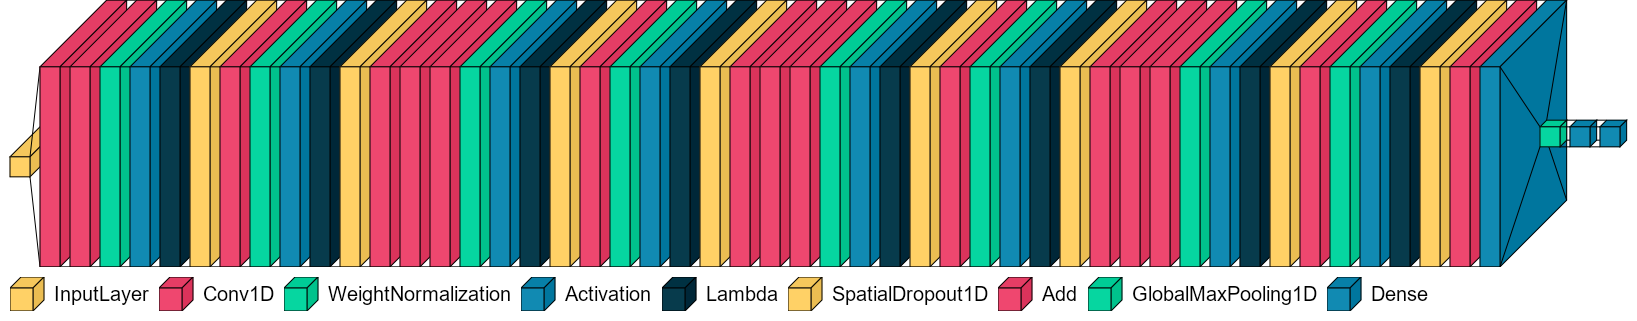

In [84]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 20)
visualkeras.layered_view(model, legend=True, font=font, max_xy=200)

### Start Training and Evaluate

Training start!
Fold iteration: 0
Epoch 1/50
21/21 [==============================] - 12s 171ms/step - loss: 2.1460 - accuracy: 0.1905 - val_loss: 1.9347 - val_accuracy: 0.2857
Epoch 2/50
21/21 [==============================] - 3s 149ms/step - loss: 1.9459 - accuracy: 0.2381 - val_loss: 1.8287 - val_accuracy: 0.3810
Epoch 3/50
21/21 [==============================] - 3s 150ms/step - loss: 1.8732 - accuracy: 0.3571 - val_loss: 1.7151 - val_accuracy: 0.4286
Epoch 4/50
21/21 [==============================] - 3s 150ms/step - loss: 1.7605 - accuracy: 0.3095 - val_loss: 1.6444 - val_accuracy: 0.3810
Epoch 5/50
21/21 [==============================] - 3s 150ms/step - loss: 1.6621 - accuracy: 0.4048 - val_loss: 1.5626 - val_accuracy: 0.3333
Epoch 6/50
21/21 [==============================] - 3s 150ms/step - loss: 1.5510 - accuracy: 0.4286 - val_loss: 1.4463 - val_accuracy: 0.4762
Epoch 7/50
21/21 [==============================] - 3s 150ms/step - loss: 1.4596 - accuracy: 0.5952 - val_loss: 1

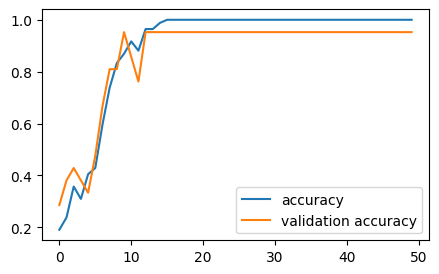

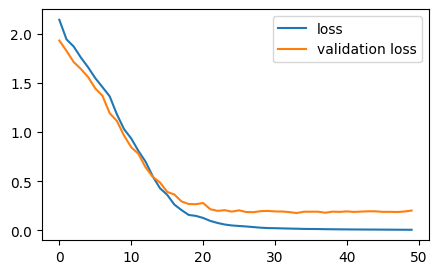



Fold iteration: 1
Epoch 1/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0651 - accuracy: 0.9881 - val_loss: 0.2421 - val_accuracy: 0.9524
Epoch 2/50
21/21 [==============================] - 3s 152ms/step - loss: 0.3427 - accuracy: 0.9643 - val_loss: 0.2630 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 3s 151ms/step - loss: 0.2345 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 3s 151ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 3s 151ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0246 - val_acc

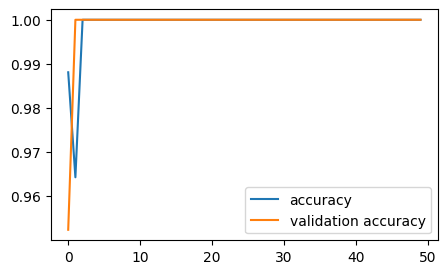

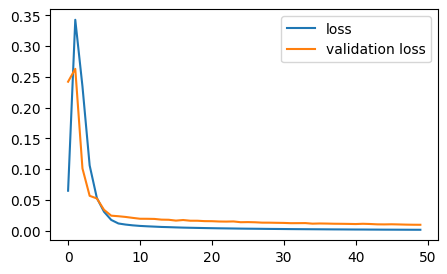



Fold iteration: 2
Epoch 1/50
21/21 [==============================] - 3s 153ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 3s 154ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 3s 153ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 3s 152ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0019 - val_acc

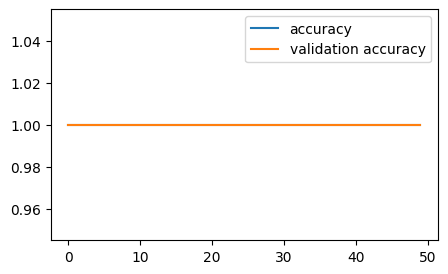

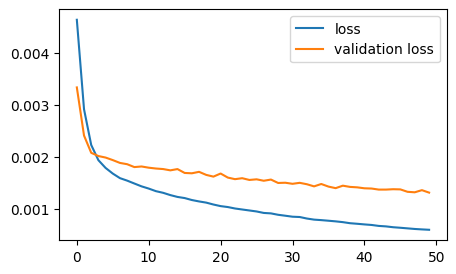



Fold iteration: 3
Epoch 1/50
21/21 [==============================] - 3s 153ms/step - loss: 7.9096e-04 - accuracy: 1.0000 - val_loss: 6.6584e-04 - val_accuracy: 1.0000
Epoch 2/50
21/21 [==============================] - 3s 152ms/step - loss: 6.9017e-04 - accuracy: 1.0000 - val_loss: 6.4649e-04 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 3s 152ms/step - loss: 6.5789e-04 - accuracy: 1.0000 - val_loss: 6.4349e-04 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 3s 152ms/step - loss: 6.3687e-04 - accuracy: 1.0000 - val_loss: 6.4946e-04 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 3s 152ms/step - loss: 6.1379e-04 - accuracy: 1.0000 - val_loss: 6.4626e-04 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 3s 152ms/step - loss: 5.9879e-04 - accuracy: 1.0000 - val_loss: 6.5054e-04 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 3s 152ms/step - loss: 5.8303

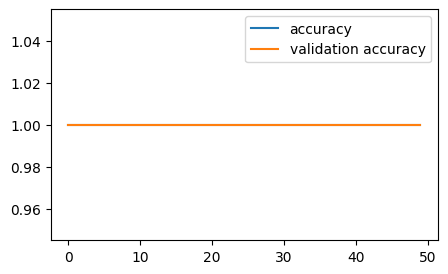

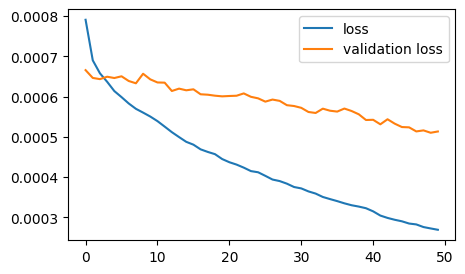



Fold iteration: 4
Epoch 1/50
21/21 [==============================] - 3s 153ms/step - loss: 3.2376e-04 - accuracy: 1.0000 - val_loss: 2.7418e-04 - val_accuracy: 1.0000
Epoch 2/50
21/21 [==============================] - 3s 152ms/step - loss: 3.1271e-04 - accuracy: 1.0000 - val_loss: 2.7633e-04 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 3s 153ms/step - loss: 2.9639e-04 - accuracy: 1.0000 - val_loss: 2.7354e-04 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 3s 152ms/step - loss: 2.8772e-04 - accuracy: 1.0000 - val_loss: 2.7217e-04 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 3s 152ms/step - loss: 2.7878e-04 - accuracy: 1.0000 - val_loss: 2.7086e-04 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 3s 152ms/step - loss: 2.7418e-04 - accuracy: 1.0000 - val_loss: 2.7367e-04 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 3s 152ms/step - loss: 2.6921

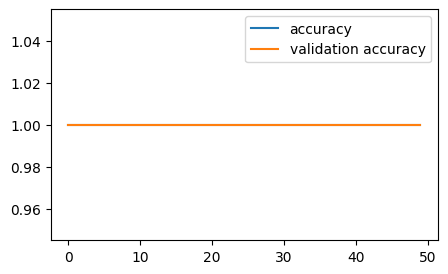

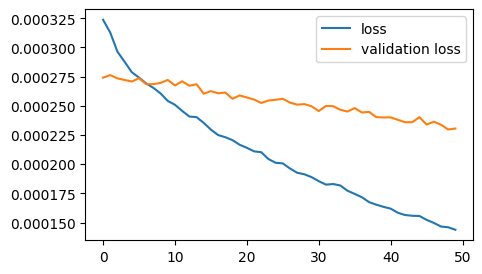



Training done!

Accuracy per-fold: [0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9142857142857143, 0.9428571428571428]
Precision per-fold: [0.9523809523809524, 0.9523809523809524, 0.9476190476190477, 0.9190476190476191, 0.9523809523809524]
Recall per-fold: [0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9142857142857144, 0.9428571428571428]
F1 score per-fold: [0.9422799422799423, 0.9422799422799423, 0.9425685425685426, 0.9139971139971141, 0.9422799422799423]

Overall Accuracy: 0.937142857142857
Overall Precision: 0.9447619047619048
Overall Recall: 0.9371428571428572
Overall F1 score: 0.9366810966810967


In [85]:
train = x_train_fold_enc
val = x_val_fold_enc
test_x = np.array(x_test_enc)
test_y = y_test_enc

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    history = model.fit(train[fold][0], train[fold][1],
                        epochs=50,
                        batch_size=4,
                        validation_data=(val[fold][0], val[fold][1]),
                        verbose=1)
    print("Model Evaluate:")
    results = model.evaluate(test_x, test_y)
    print(f"Test Loss: {results[0]}\nTest Accuracy: {results[1]}")
    pred = []
    y_pred = model.predict(test_x)
    for result in np.round(y_pred):
        pred.append(np.argmax(result)) # convert one-hot result to integer
    pred = np.array(pred)
    print("Actual:   ", test_y)
    print("Predicted:", pred)
    fold_accuracy.append(accuracy_score(test_y, pred))
    fold_precision.append(precision_score(test_y, pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(test_y, pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(test_y, pred, average='macro', zero_division=0))
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['accuracy','validation accuracy'])
    plt.pause(0.0001)
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss','validation loss'])
    plt.pause(0.0001)
    print("\n")
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

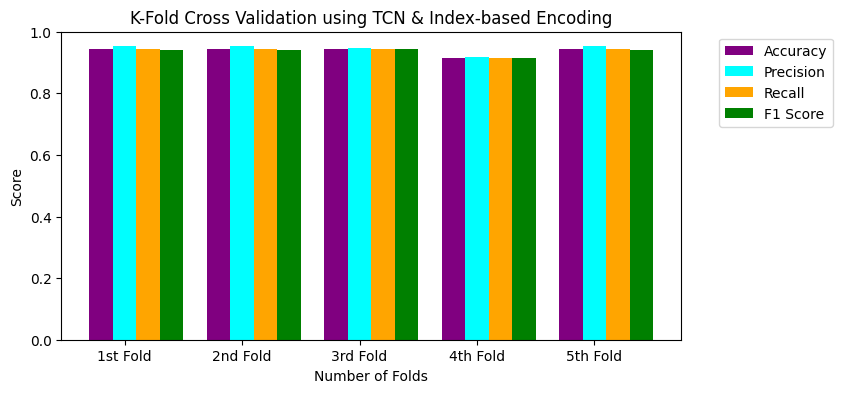

In [90]:
# Visualize evaluation score
plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using TCN & Index-based Encoding")
plt.show()

In [91]:
print("Actual:   ", test_y)
print("Predicted:", pred)

Actual:    [3 6 3 4 1 0 0 4 3 1 2 0 4 0 1 5 3 6 2 2 5 5 2 3 2 6 4 5 6 1 1 6 0 5 4]
Predicted: [3 6 3 4 1 0 0 4 3 1 0 0 4 0 1 5 1 6 2 2 5 5 2 3 2 6 4 5 6 1 1 6 0 5 4]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       0.83      1.00      0.91         5
           MERS-CoV       0.83      1.00      0.91         5
Parainfluenza virus       1.00      0.80      0.89         5
     Rhinovirus-HRV       1.00      0.80      0.89         5
         SARS-CoV-2       1.00      1.00      1.00         5
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         5

           accuracy                           0.94        35
          macro avg       0.95      0.94      0.94        35
       weighted avg       0.95      0.94      0.94        35



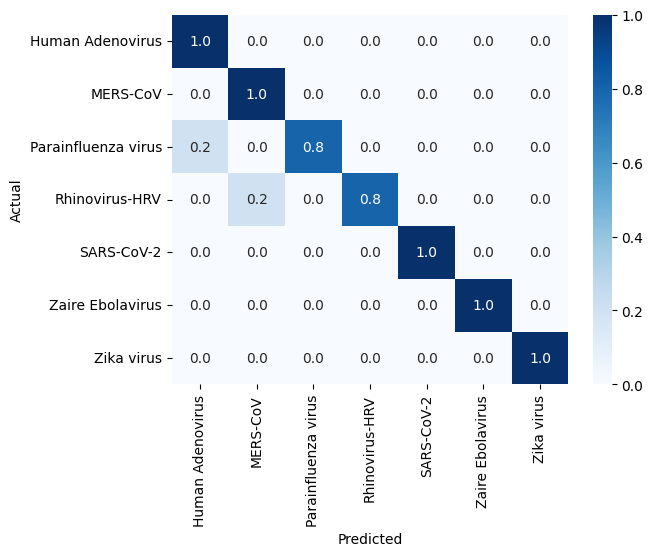

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = pd.DataFrame(confusion_matrix(test_y, pred) * 1 / 5, columns=target_names, index=target_names)
sns.heatmap(cf_matrix, annot=True, vmin=0, fmt='.1f', cbar=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Save Model

In [90]:
model.save("model.h5")

# Input Test Data

<b>Index-based Encoding</b>

In [94]:
input_data = "MG572235.1.fasta"
sequences = []
seq_IDs = []
for record in SeqIO.parse(input_data, "fasta"):
    sequences.append(record.seq)
    seq_IDs.append(record.id)

result = dna_index_encoding(str(sequences[0]), 3)

In [95]:
# pad sequences for filling the blank arrays
x = pad_sequences([result], padding='post', truncating='post', maxlen=pad_length_enc)
x

array([[45, 34,  5, ...,  0,  0,  0]])

In [96]:
x.shape

(1, 35999)

In [97]:
new_pred = np.round(model.predict(x))
new_pred

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [98]:
target_names[np.argmax(new_pred)]

'Zaire Ebolavirus'

<b>N-mers Frequency</b>

In [94]:
input_data = "NC_045512.2.fasta"
sequences = []
seq_IDs = []
for record in SeqIO.parse(input_data, "fasta"):
    sequences.append(record.seq)
    seq_IDs.append(record.id)

result = n_mers(str(sequences[0]), 3)

In [95]:
new_arr = []

for string in dna_ordered_list:
    new_arr.append(result[string])

In [96]:
x = np.array(new_arr)
x = np.reshape(x, (1, 64))
x.shape

(1, 64)

In [97]:
new_pred = np.round(model.predict(x))
new_pred

1/1 [==============================] - 0s 267ms/step


array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [98]:
target_names[np.argmax(new_pred)]

'SARS-CoV-2'

<b>Conjoint Triad</b>

In [112]:
input_data = "NC_045512.2.txt"
sequences = []
seq_IDs = []
new_conj_df = []
for record in SeqIO.parse(input_data, "fasta"):
    sequences.append(record.seq)
    seq_IDs.append(record.id)

result = conjoint_triad(sequences, seq_IDs)
header = conjoint_triad.vs_header
header.remove('GenBank ID')
data = pd.read_csv("conjoint_triad.csv", index_col=0)
os.remove("conjoint_triad.csv")
conj_t = list(data.sum())

new_conj_df = pd.DataFrame(columns=header)
new_conj_df.loc[len(new_conj_df.index)] = conj_t

In [113]:
new_conj_df

,VS111,VS211,VS311,VS411,VS511,VS611,VS711,VS121,VS221,VS321,...,VS567,VS667,VS767,VS177,VS277,VS377,VS477,VS577,VS677,VS777
0,139,141,110,81,69,101,14,136,151,144,...,5,0,0,3,2,9,2,1,0,0


In [114]:
x = np.array(new_conj_df)
x.shape

(1, 343)

In [115]:
new_pred = np.round(model.predict(x))
new_pred

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [116]:
target_names[np.argmax(new_pred)]

'SARS-CoV-2'